# Цель работы
Освоить методы решения задач линейного программирования с использованием различных библиотек Python и графического метода.

# Задачи:
1. Решить ЗЛП на минимум и максимум
$$F = 2x₁ – x₂ → min,max$$

$$ x ₁≤3 $$
$$ x ₁≥−1 $$
$$ −2 x ₁−3 x ₂≤ 6 $$
$$ −x ₁+2 x ₂≤ 6 $$


с помощью:

  - Библиотеки pulp

  - Библиотеки scipy.optimize

  - Библиотеки cvxopt

2. Построить графическое решение с областью допустимых значений и оптимальными точками.

3. Сравнить результаты, время работы и точность разных методов.

# Решение с использованием библиотеки PuLP

Импорт библиотек: pulp - специализированная библиотека для линейного программирования, time - для измерения времени выполнения

In [482]:
from pulp import *
import time

Старт таймера: Начало измерения времени для PULP

In [483]:
start = time.time()

Определение переменных: Создает переменные x1 и x2 без ограничений снизу (lowBound=None), так как ограничения будут заданы отдельно

In [484]:
x1 = LpVariable("x1", lowBound=None)
x2 = LpVariable("x2", lowBound=None)

Инициализация задачи максимизации: Создает объект задачи с именем "Maximize" и направлением оптимизации LpMaximize

In [485]:
prob_max = LpProblem("Maximize", LpMaximize)

Определение целевой функции: Добавляет целевую функцию 2*x1 - x2 к задаче максимизации

In [486]:
prob_max += 2*x1 - x2

Добавление ограничений: Последовательно добавляем четыре ограничения задачи:

In [487]:
prob_max += x1 <= 3        # Первое ограничение: x1 ≤ 3
prob_max += x1 >= -1       # Второе ограничение: x1 ≥ -1
prob_max += -2*x1 - 3*x2 <= 6  # Третье ограничение: -2x1 - 3x2 ≤ 6
prob_max += -x1 + 2*x2 <= 6    # Четвертое ограничение: -x1 + 2x2 ≤ 6

Решение задачи: Запускаем алгоритм оптимизации для задачи максимизации

In [488]:
prob_max.solve()

1

Извлечение оптимального значения: Получает численное значение целевой функции в точке оптимума

In [489]:
max_val = value(prob_max.objective)

Извлечение координат оптимальной точки: Получает значения переменных x1 и x2 в оптимальной точке

In [490]:
max_point = (x1.varValue, x2.varValue)

Инициализация задачи минимизации: Создает новую задачу с направлением LpMinimize

In [491]:
prob_min = LpProblem("Minimize", LpMinimize)

Целевая функция для минимизации: Та же целевая функция, но теперь минимизируется

In [492]:
prob_min += 2*x1 - x2

Дублирование ограничений: Те же ограничения, что и для максимизации

In [493]:
prob_min += x1 <= 3        # Первое ограничение: x1 ≤ 3
prob_min += x1 >= -1       # Второе ограничение: x1 ≥ -1
prob_min += -2*x1 - 3*x2 <= 6  # Третье ограничение: -2x1 - 3x2 ≤ 6
prob_min += -x1 + 2*x2 <= 6    # Четвертое ограничение: -x1 + 2x2 ≤ 6

Решение задачи минимизации: Запуск алгоритма оптимизации

In [494]:
prob_min.solve()

1

Извлечение минимального значения: Значение целевой функции в точке минимума

In [495]:
min_val = value(prob_min.objective)

Координаты точки минимума: Значения переменных в оптимальной точке для минимизации

In [496]:
min_point = (x1.varValue, x2.varValue)

Фиксация времени окончания: Запись времени завершения вычислений для PULP

In [497]:
stop = time.time()

Расчет времени выполнения: Разница между конечным и начальным временем для pulp

In [498]:
pulp_time = stop - start

Вывод результатов: Форматированный вывод оптимальных значений, точек и времени выполнения

In [499]:
print("Результат pulp:")
print(f"Max F = {max_val} at {max_point}")  # Максимальное значение и точка
print(f"Min F = {min_val} at {min_point}")  # Минимальное значение и точка
print(f"Время: {pulp_time} sec")         # Время выполнения

Результат pulp:
Max F = 10.0 at (3.0, -4.0)
Min F = -4.5 at (-1.0, 2.5)
Время: 0.14996814727783203 sec


# Решение с использованием библиотеки CVXOPT

Импорт CVXOPT: Библиотека для выпуклой оптимизации

In [500]:
from cvxopt.modeling import variable, op

Старт таймера: Начало измерения времени для CVXOPT

In [501]:
start = time.time()

Определение переменных: Создание переменных оптимизации

In [502]:
x1 = variable()
x2 = variable()

Целевая функция: функция для минимизации

In [503]:
objective_min = 2*x1 - x2

Список ограничений: Все ограничения собраны в массив

In [504]:
constraints_min = [
    x1 <= 3,           # x1 ≤ 3
    x1 >= -1,          # x1 ≥ -1
    -2*x1 - 3*x2 <= 6, # -2x1 - 3x2 ≤ 6
    -x1 + 2*x2 <= 6    # -x1 + 2x2 ≤ 6
]

Решение задачи: Создание и решение задачи минимизации

In [505]:
prob_min = op(objective_min, constraints_min)
prob_min.solve(solver='glpk')

Извлечение результатов: Получение значений через атрибуты .value()

In [506]:
min_val = prob_min.objective.value()[0]  # Значение целевой функции в минимуме
min_point = (x1.value[0], x2.value[0])   # Точка минимума

Целевая функция для максимизации: Та же функция, но для максимума

In [507]:
objective_max = 2*x1 - x2

Ограничения для максимизации: Те же ограничения

In [508]:
constraints_max = [
    x1 <= 3,           # x1 ≤ 3
    x1 >= -1,          # x1 ≥ -1
    -2*x1 - 3*x2 <= 6, # -2x1 - 3x2 ≤ 6
    -x1 + 2*x2 <= 6    # -x1 + 2x2 ≤ 6
]

Задача максимизацией: Поскольку CVXOPT не поддерживает прямую максимизацию, минимизируется отрицательная целевая функция

In [509]:
prob_max = op(-objective_max, constraints_max)
prob_max.solve(solver='glpk')

Корректировка результата: Умножение на -1 для получения правильного значения максимума

In [510]:
max_val = -prob_max.objective.value()[0]  # Значение целевой функции в максимуме
max_point = (x1.value[0], x2.value[0])    # Точка максимума

Фиксация времени окончания: Запись времени завершения вычислений для CVXOPT

In [511]:
stop = time.time()

Расчет времени выполнения: Разница между конечным и начальным временем для CVXOPT

In [512]:
cvxopt_time = stop - start

Вывод результатов CVXOPT: Аналогично PuLP

In [513]:
print("Резёльтат cvxopt:")
print(f"Max F = {max_val} at {max_point}")  # Максимальное значение и точка
print(f"Min F = {min_val} at {min_point}")  # Минимальное значение и точка
print(f"Время: {cvxopt_time} sec")         # Время выполнения

Резёльтат cvxopt:
Max F = 10.0 at (3.0, -4.0)
Min F = -4.5 at (-1.0, 2.5)
Время: 0.08070993423461914 sec


# Решение с использованием SciPy

Импорт linprog: Функция для линейного программирования из SciPy

In [514]:
from scipy.optimize import linprog

Старт таймера: Начало измерения времени для SciPy

In [515]:
start = time.time()

Коэффициенты целевых функций: Минимизация и максимизация

In [516]:
# Целевая функция для минимизации: 2x1 - x2
c_min = [2, -1]
# Целевая функция для максимизации: -2x1 + x2
c_max = [-2, 1]

Матрица ограничений: Преобразование всех ограничений в форму A_ub * x <= b_ub

In [517]:
A_ub = [
    [1, 0],    # x1 <= 3
    [-1, 0],   # -x1 <= 1  → x1 >= -1
    [-2, -3],  # -2x1 - 3x2 <= 6
    [-1, 2]    # -x1 + 2x2 <= 6
]
b_ub = [3, 1, 6, 6]

Неограниченные переменные: Обе переменные могут принимать любые значения

In [518]:
bounds = [(None, None), (None, None)]

Решение задачи максимизации

In [519]:
res_max = linprog(c_max, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

Решение задачи минимизации

In [520]:
res_min = linprog(c_min, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

Фиксация времени окончания: Запись времени завершения вычислений для SCIPY

In [521]:
stop = time.time()

Расчет времени выполнения: Разница между конечным и начальным временем для SCIPY

In [522]:
scipy_time = stop - start

Вывод результатов: Корректировка значения максимума (умножение на -1)

In [523]:
print("Резёльтат scipy.optimize:")
print(f"Max F = {-res_max.fun} at ({res_max.x[0]}, {res_max.x[1]})")  # Максимальное значение и точка
print(f"Min F = {res_min.fun} at ({res_min.x[0]}, {res_min.x[1]})")  # Минимальное значение и точка
print(f"Время: {cvxopt_time} sec")         # Время выполнения

Резёльтат scipy.optimize:
Max F = 10.0 at (3.0, -4.0)
Min F = -4.5 at (-1.0, 2.5)
Время: 0.08070993423461914 sec


# Сравнение производительности

Словарь времен: Структура для хранения времени выполнения всех методов

In [524]:
times = {
    'pulp': pulp_time,
    'cvxopt': cvxopt_time,
    'scipy.optimize': scipy_time
}

Определение самого быстрого метода: Использование функции min с ключом times.get для нахождения метода с минимальным временем

In [525]:
fastest_method = min(times, key=times.get)
fastest_time = times[fastest_method]

Таблица сравнения: Форматированный вывод времени выполнения для каждого метода и вывод победителя

In [526]:
print("\nСравнение производительности методов:")
for method, time_val in times.items():
    print(f"{method}: {time_val:.6f} сек")

print(f"Самый быстрый метод: {fastest_method} ({fastest_time:.6f} сек)")


Сравнение производительности методов:
pulp: 0.149968 сек
cvxopt: 0.080710 сек
scipy.optimize: 0.048787 сек
Самый быстрый метод: scipy.optimize (0.048787 сек)


# Графическое отображение

Импорт библиотек визуализации: matplotlib для графиков, numpy для математических операций

In [527]:
import matplotlib.pyplot as plt
import numpy as np

Создание сетки размером 400 в диапазоне [-2, 4]

In [528]:
x1 = np.linspace(-2, 4, 400)

создание ограничений

In [529]:
cond1 = (-2*x1 - 6)/3
cond2 = (6 + x1)/2

Инициализация графика: Создание фигуры с заданным размером

In [530]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Построение графика:
- Графическое отображение преобразованных ограничений
- Создание вертикальных ограничений
- Создание границы заливки(Определение области между ограничениями с искусственными пределами для видимости)
- Создание маски допустимой области(Логическая маска, определяющая где x1 между -1 и 3, и где верхняя граница выше нижней)
- Заливка допустимой области(Визуальное выделение области серым цветом, удовлетворяющей всем ограничениям),
- Создание точки максимума(Красная точка с подписью значения целевой функции)
- Создание точки минимума(Синяя точка с подписью значения целевой функции)
- Финальная настройка графика( Установка пределов, подписей, заголовка, сетки и отображение)

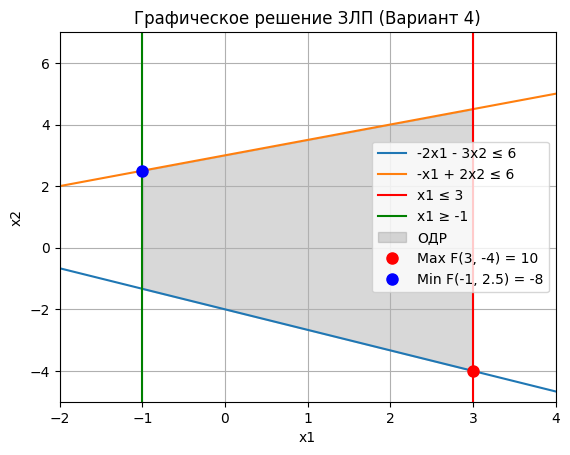

In [531]:
plt.plot(x1, cond1, label='-2x1 - 3x2 ≤ 6')  # Линия первого ограничения
plt.plot(x1, cond2, label='-x1 + 2x2 ≤ 6')   # Линия второго ограничения

plt.axvline(x=3, color='red', label='x1 ≤ 3')      # Красная вертикальная линия при x1=3
plt.axvline(x=-1, color='green', label='x1 ≥ -1') # Зеленая вертикальная линия при x1=-1

x2_min = np.maximum(cond1, -10)  # Нижняя граница (не ниже -10 для видимости)
x2_max = np.minimum(cond2, 10)   # Верхняя граница (не выше 10 для видимости)

mask = (x1 >= -1) & (x1 <= 3) & (x2_min < x2_max)

plt.fill_between(x1[mask], x2_min[mask], x2_max[mask], alpha=0.3, color='gray', label='ОДР')

plt.plot(res_max.x[0], res_max.x[1], 'ro', markersize=8, label='Max F(3, -4) = 10')

plt.plot(res_min.x[0], res_min.x[1], 'bo', markersize=8, label='Min F(-1, 2.5) = -8')

plt.xlim(-2, 4)      # Границы по оси x
plt.ylim(-5, 7)      # Границы по оси y
plt.xlabel('x1')     # Подпись оси x
plt.ylabel('x2')     # Подпись оси y
plt.title('Графическое решение ЗЛП (Вариант 4)')  # Заголовок графика
plt.grid(True)       # Включение сетки
plt.legend()         # Отображение легенды
plt.show()           # Показать график